In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Age = 나이
Attrition = 퇴직여부
BusinessTravel = 출장빈도
DailyRate = 일당
Department = 부서
DistanceFromHome = 통근거리
Education = 학력
EducationField = 전공
EmployeeCount = 직원 수
EmployeeNumber = 직원번호
RelationshipSatisfaction = 동료와의 관계 만족도
StandardHours = 표준 근로 시간
StockOptionLevel = 스톡옵션 부여 수준
TotalWorkingYears = 총 경력기간
TrainingTimesLastYear = 작년 교육훈련 횟수
WorkLifeBalance = 워라밸 (일과 삶의 균형 만족도)
YearsAtCompany = 현 직장 근속 연수
YearsInCurrentRole = 현 직무 근속 연수
YearsSinceLastPromotion = 마지막 승진 이후 경과 연수
YearsWithCurrManager = 현재 상사(사수)와 함께 일한 기간

In [6]:
attrition_count = data['Attrition'].value_counts()
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100

print("퇴직 여부")
print(attrition_count)
print("\n퇴직 여부 비율")
print(attrition_rate)

퇴직 여부
Attrition
No     1233
Yes     237
Name: count, dtype: int64

퇴직 여부 비율
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


### '직무'

In [ ]:
attrition_job = data.groupby('JobRole')['Attrition'].value_counts(normalize=True) * 100

print(attrition_job)

Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


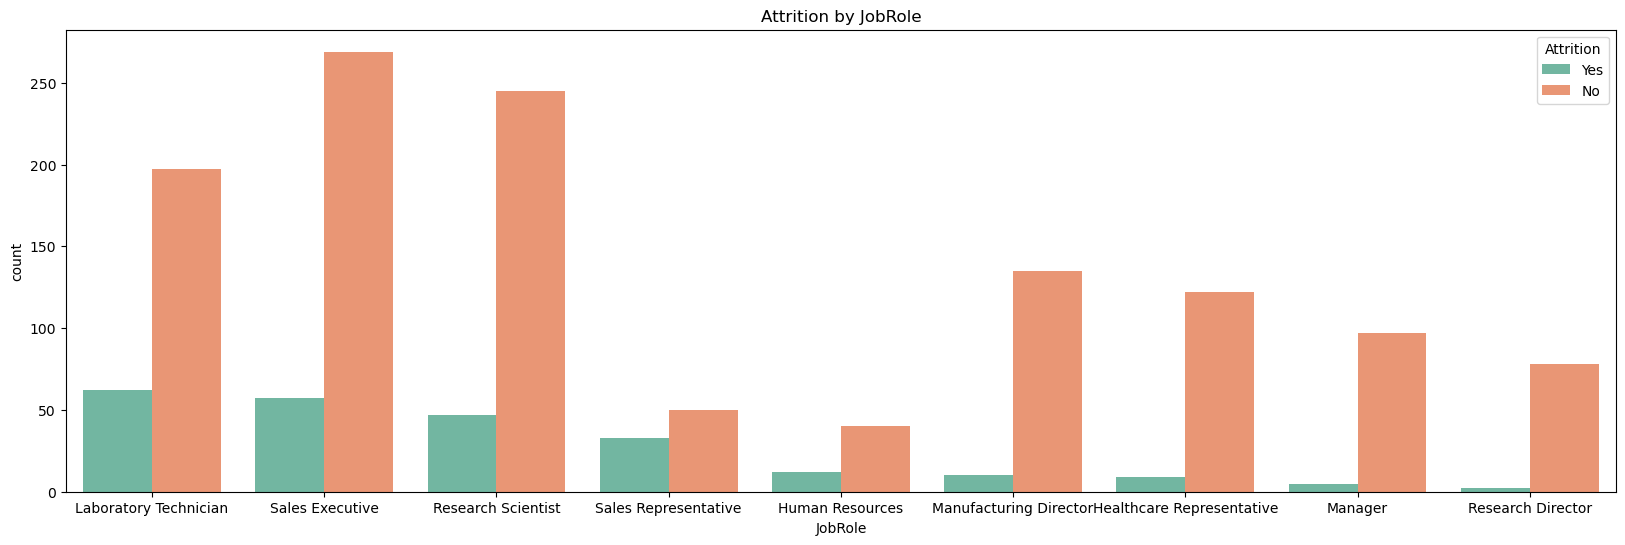

In [19]:
job_attrition_order = data[data['Attrition'] == 'Yes']['JobRole'].value_counts().index

plt.figure(figsize=(20, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set2', order=job_attrition_order)
plt.title('Attrition by JobRole')
plt.show()

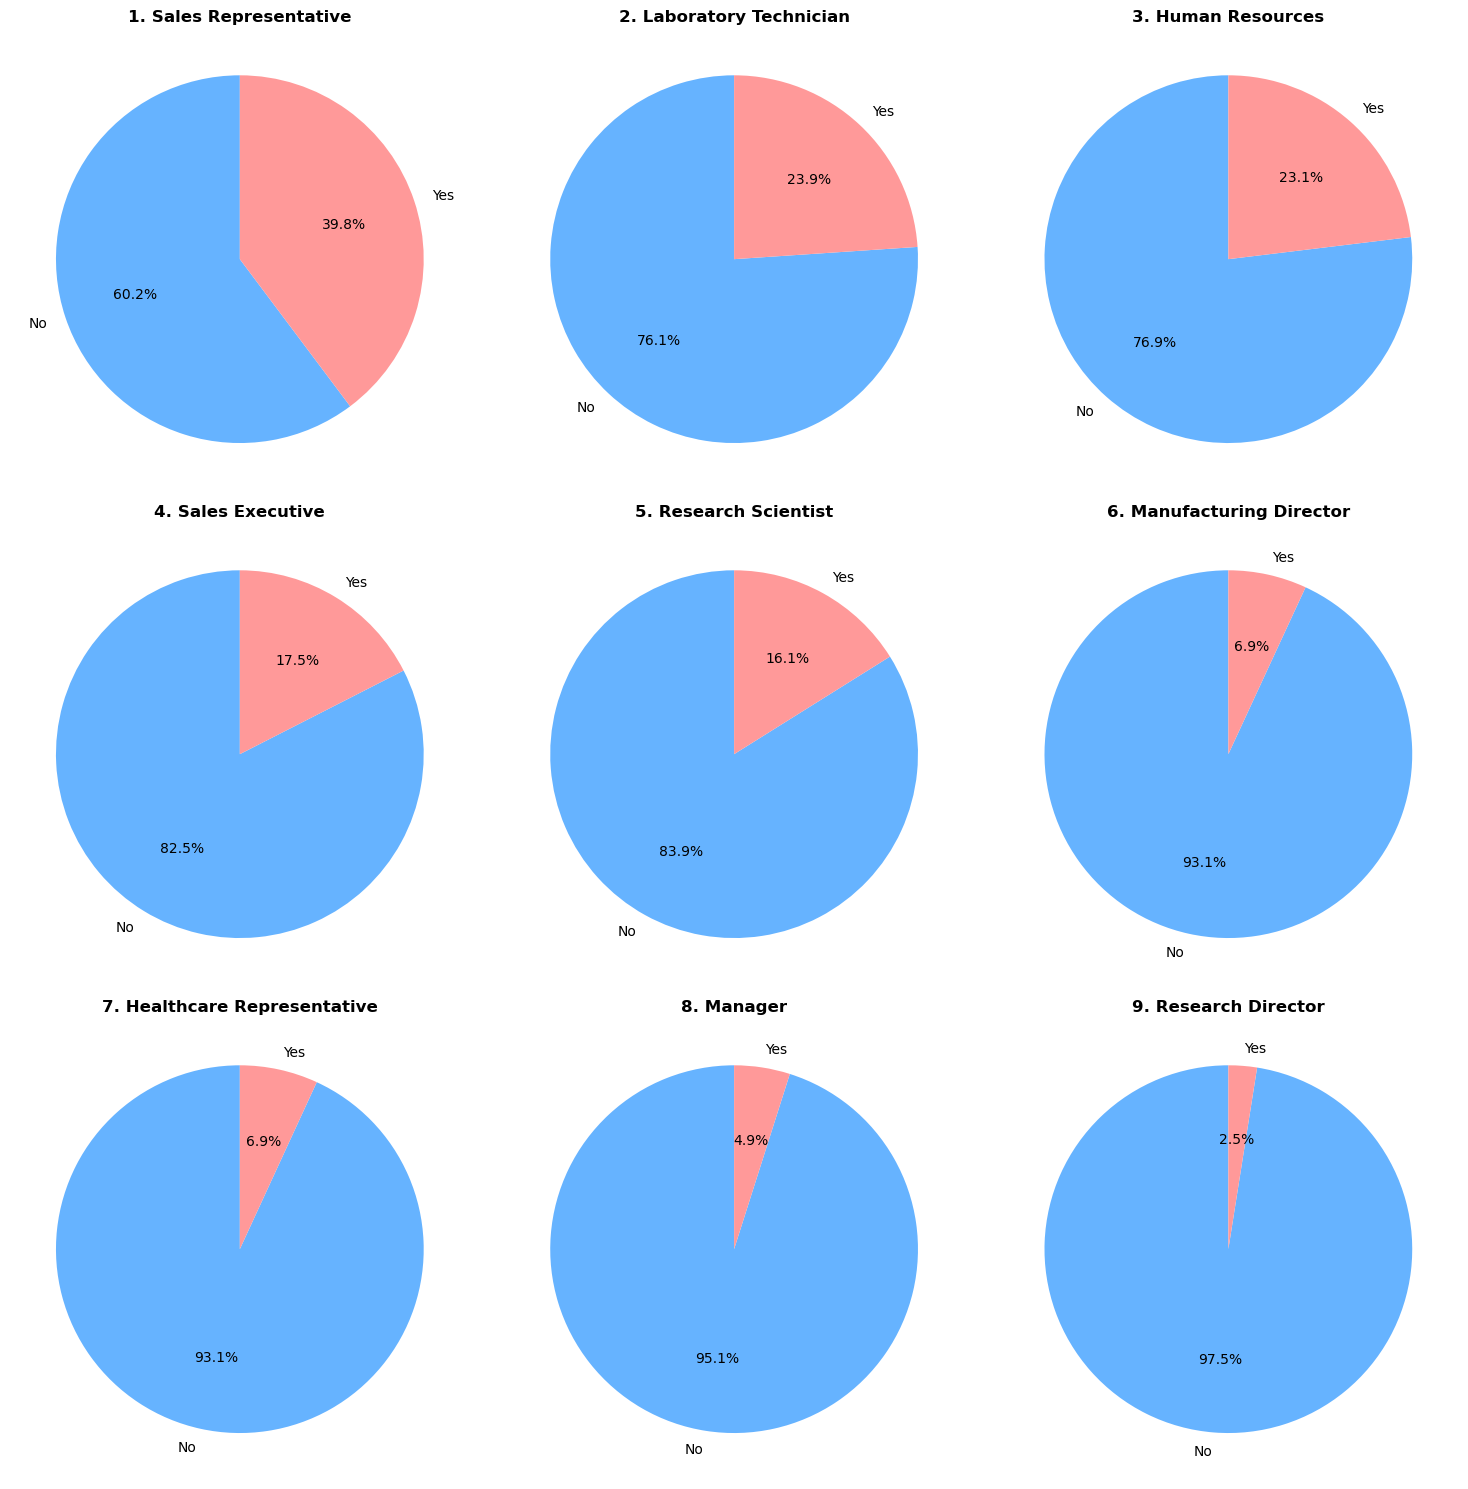

In [ ]:
# 1. 직무별 퇴직률 계산 및 정렬
job_attrition_rates = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
#JobRole(직무)끼리 묶어서 Attrition(퇴직여부)의 갯수를 normalize=True 비율로 계산한다. fillna(0) = 만약 퇴직자가 0명인 직무가 있다면 에러 대신 0을 채워넣는다.
sorted_job_roles = job_attrition_rates.sort_values(by='Yes', ascending=False).index
#sort_values(by='Yes', ascending=False) - Attrition 항목에서 'Yes'를 기준으로 내림차순(큰것부터) 정렬
#.index = 계산한 값은 버리고 계산된 값의 행(직무명)만 순서대로 가져온다.


# 2. 그래프 레이아웃 설정 (3행 3열)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
#fig = 전체 도화지 / axes = 그 안에 들어갈 각각의 칸(9개)
#plt.subplots(3, 3) = 가로3칸 세로3칸의 표를 만든다.
axes = axes.flatten()
#반복문을 사용하기 위해 2차원으로 되어있는 axes를 1차원 리스트로 쭉 펴준다.
 

# 3. 정렬된 순서(sorted_job_roles)대로 원형 그래프 생성
for i, role in enumerate(sorted_job_roles):
    # axes를 9칸으로 나눠놨기 때문에 각 값에 순서를 매기고 값을 순서대로 그래프로 만들기 위해 for i 를 사용
    # enumerate() = 반복계산하여 나온 값을 (순서,내용물) 세트로 묶어달라. ex) (0, 'Sales'), (1, 'Research'), (2, 'HR') ~~
    # for i, role in = 위에서 enumerate로 나온 값을 i(순서(인덱스)) 와 role(직무(값)) 에 나눠 담는다.
    # ex) i = (0, 1, 2, ~~) / role = ('Sales', 'Reserch', 'HR'~)

    role_data = data[data['JobRole'] == role]['Attrition'].value_counts()
    # data['JobRole'] == role - 전체 데이터의 'JobRole'(직무) 칸 중에서 지금 반복문으로 반복하고 있는 '직무'(role)와 똑같은 행이 어딘지 찾는다.

    # 원형 그래프 시각화 (No와 Yes의 순서를 고정하기 위해 index로 정렬 추천)
    role_data = role_data.reindex(['No', 'Yes'], fill_value=0) 
    #퇴직자(yes)가 0명인 경우가 있을 수 있으니 순서를 'No','Yes'로 변경하여 값을 구한다.
    
    axes[i].pie(                    #[i]번째 칸에 pie(원형) 그래프를 그려라.
        role_data,                  #숫자(밸류)
        labels=role_data.index,     #'Yes','No'라는 이름의 인덱스
        autopct='%1.1f%%',          #그래프 안에 소수점 첫째 자리까지 퍼센트를 표시하라
        startangle=90,              #원의 시작점을 12시방향으로 동일하게 맞춰라.
        colors=['#66b3ff', '#ff9999'], # No: 하늘색, Yes: 분홍색
    )
    axes[i].set_title(f'{i+1}. {role}', fontsize=12, fontweight='bold')
    # i번에 해당하는 제목에 i+1을 한 숫자를 넣어라.


plt.tight_layout()
plt.show()

Sales Executive = 영업관리
Laboratory Technician = 실험실 기술직
Human Resources = 인사담당자
Sales Representative = 영업사원
Research Scientist = 연구원
Manufacturing Director = 제조/생산 책임자
Healthcare Representative = 의료영업 담당자
Manager = 매니저(부서장)
Research Director = 연구소장